# **Project Name**    - Appliance Energy Prediction



##### **Project Type**    - Regression
##### **Name** - Prachi

# **Project Summary -**

This project focuses on predicting household energy consumption using the Appliance Energy Prediction dataset. In an era where smart homes and energy efficiency are increasingly important, understanding how various environmental and internal factors affect electricity usage is critical. The main objective of this project is to build a machine learning model that can accurately predict how much energy home appliances consume, based on multiple indoor and outdoor environmental conditions recorded over time.

The dataset used in this project includes timestamped records of household energy usage and a variety of contextual variables. The target variable is Appliances, which represents the energy consumed by appliances in watt-hours (Wh) at each time step. The data is collected at regular intervals and includes additional information such as energy consumed by lighting (lights), temperature (T1 to T9) and humidity (RH_1 to RH_9) from different zones or rooms within the house, as well as outdoor metrics like temperature, pressure, humidity, wind speed, visibility, and dew point. Two columns, rv1 and rv2, are random variables and do not hold meaningful predictive value, and can be dropped during preprocessing.

This project provides valuable insights not only from a data science perspective but also from a practical application standpoint. It simulates a real-world scenario where smart homes can use predictive models to optimize energy usage, reduce costs, and minimize environmental impact. It also avoids the complexities of unstructured text or image data, making it an ideal project for focusing on structured numeric data, time series analysis, and regression modeling techniques.

# **GitHub Link -**

[Click here to view project](https://github.com/Prachi957/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb)

# **Problem Statement**


The goal of this project is to develop a predictive model that estimates household energy consumption based on a variety of environmental and contextual variables. Specifically, the model aims to predict the energy consumed by appliances (measured in watt-hours) at each timestamp, using features such as indoor temperatures and humidity across different rooms, outdoor weather conditions, lighting usage, and temporal patterns.

This problem is framed as a supervised regression task, where the target variable is the Appliances column, and the predictors include a combination of time-series, meteorological, and internal environmental data. Accurate prediction of energy usage is essential for optimizing power consumption in smart homes, enabling better energy management, cost savings, and environmental sustainability.

The challenge lies in understanding how multiple factors—many of which are dynamic and interdependent—affect energy usage throughout the day. The project also involves identifying the most influential features that drive appliance-level energy demand, which can inform energy-efficient designs and control systems.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures



### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


Text(0.5, 1.0, 'Missing Values Heatmap')

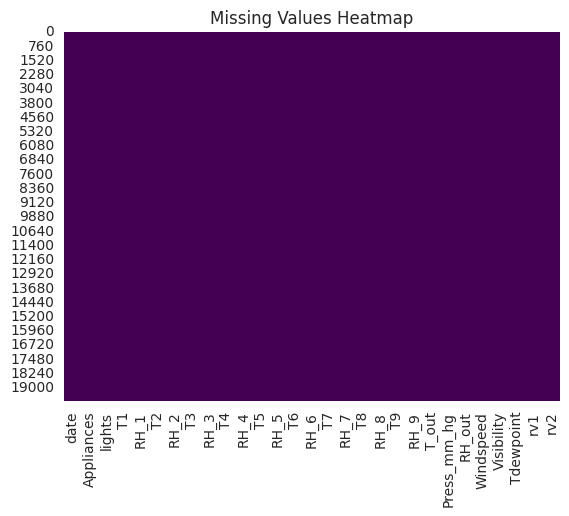

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")

### What did you know about your dataset?

The dataset contains timestamped measurements of energy consumption in a smart home environment, along with various environmental features. The goal is to predict the amount of energy consumed by appliances (Appliances column) using factors like indoor temperature and humidity, lighting usage, and outdoor weather conditions. The data is multivariate, mostly numerical, and collected over time, making it suitable for regression and time-series analysis. The target variable is continuous, and most input features are real-valued sensor readings. No text data is present.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description

**Date** -	Timestamp of data recording (datetime format).

**Appliances** -	Target variable; energy used by appliances (in Wh).

**Lights** -	Energy consumed by lighting (in Wh).

**T1–T9** -	 Temperatures (°C) from different indoor zones.

**RH_1–RH_9** -	 Relative humidity (%) in corresponding zones.

**T_out**	-  Outdoor temperature (°C).

**RH_out** -  Outdoor humidity (%).

**Press_mm_hg** - 	Atmospheric pressure (mm Hg).

**Windspeed**	-  Wind speed (m/s).

**Visibility**	-  Visibility outside (meters).

**Tdewpoint**	-  Dew point temperature (°C).

**rv1, rv2**	-  Random variables (can be dropped, not meaningful).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
date,19735
Appliances,92
lights,8
T1,722
RH_1,2547
T2,1650
RH_2,3376
T3,1426
RH_3,2618
T4,1390


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


In [ ]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [ ]:
# Extract time-based features

df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
print(df[['date', 'hour', 'day_of_week', 'month', 'is_weekend']].head())

                 date  hour  day_of_week  month  is_weekend
0 2016-01-11 17:00:00    17            0      1           0
1 2016-01-11 17:10:00    17            0      1           0
2 2016-01-11 17:20:00    17            0      1           0
3 2016-01-11 17:30:00    17            0      1           0
4 2016-01-11 17:40:00    17            0      1           0


In [ ]:
# Drop unnecessary columns

df.drop(columns=['date', 'rv1', 'rv2'], inplace=True)
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'hour', 'day_of_week', 'month', 'is_weekend'],
      dtype='object')

In [ ]:
# Move 'Appliances' column to the end

df = df[[col for col in df.columns if col != 'Appliances'] + ['Appliances']]
df.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,day_of_week,month,is_weekend,Appliances
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,733.5,92.0,7.000000,63.000000,5.3,17,0,1,0,60
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,733.6,92.0,6.666667,59.166667,5.2,17,0,1,0,60
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,733.7,92.0,6.333333,55.333333,5.1,17,0,1,0,50
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,733.8,92.0,6.000000,51.500000,5.0,17,0,1,0,50
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,733.9,92.0,5.666667,47.666667,4.9,17,0,1,0,60


### What all manipulations have you done and insights you found?

*   Converted date column to datetime format.

*   Extracted new time-based features: hour, day_of_week, month, is_weekend.

*   Dropped unnecessary columns: date, rv1, and rv2.

*   Moved Appliances column to the end for clarity.

 **Insights** -

*   No missing values in any column — dataset is clean.

*   All features are numerical and suitable for regression.

*   Temperature and humidity readings vary by zone and are likely important predictors.

*   Appliance usage may depend on time features like hour and weekend.

*   Target variable Appliances shows a wide range (10–1080 Wh), suggesting some outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'hour',
       'day_of_week', 'month', 'is_weekend', 'Appliances'],
      dtype='object')

#### Chart - 1 Distribution of Appliance Energy Usage

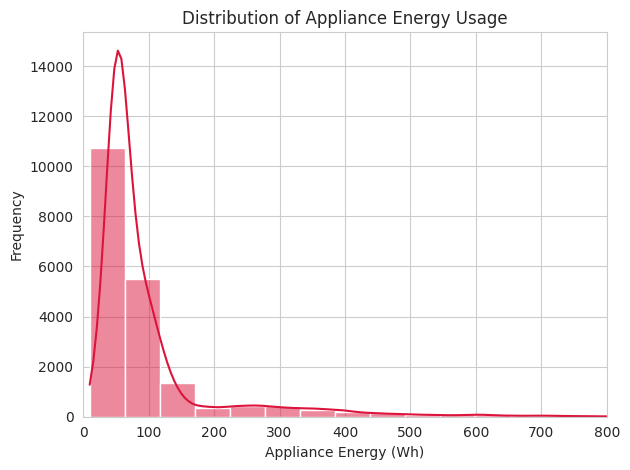

In [ ]:
# Chart - 1 visualization code
sns.set_style('whitegrid')
sns.histplot(df['Appliances'], bins=20, color='crimson', kde=True)
plt.xlim(0, 800)
plt.title('Distribution of Appliance Energy Usage')
plt.xlabel('Appliance Energy (Wh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

We're seeing a right-skewed distribution, which means: Most appliance energy usage is low (e.g., 10–200 Wh). Very few instances have high usage (e.g., 800–1000 Wh). It’s common in real-world energy data — people rarely run heavy appliances constantly.

The histogram reveals that most energy consumption events are low, with few high-usage spikes. This helps businesses identify typical load patterns, detect outlier usage, and design more efficient energy plans or automation strategies, ultimately reducing energy waste and cost.


#### Chart - 2 Hourly Appliance usage by Day of Week

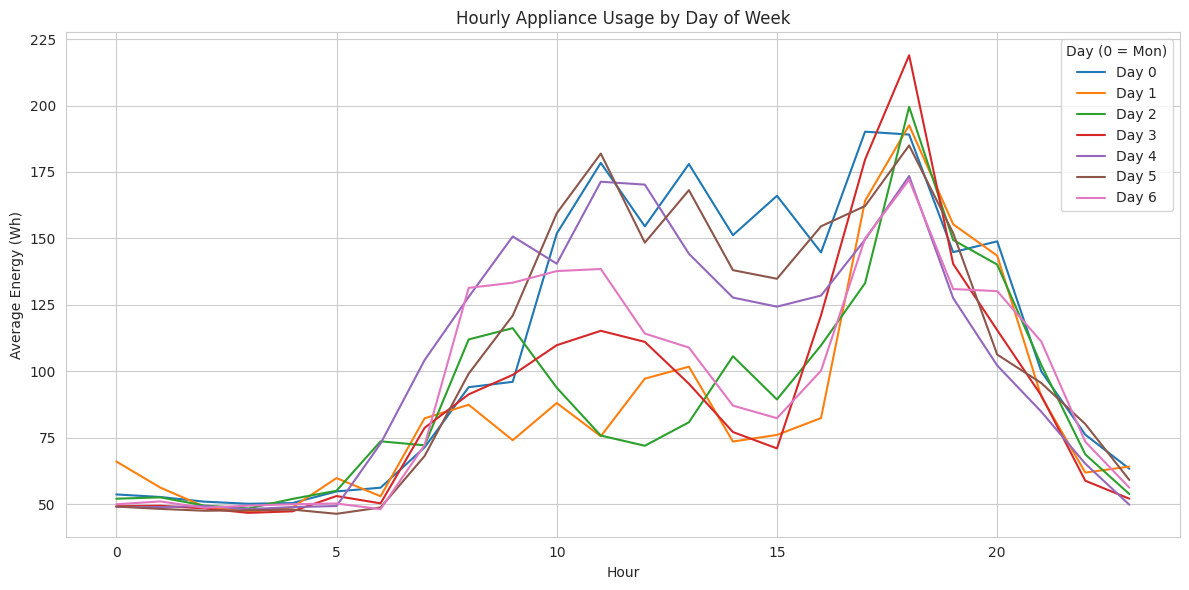

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))

# Group and plot
for day in range(7):
    hourly_usage = df[df['day_of_week'] == day].groupby('hour')['Appliances'].mean()
    plt.plot(hourly_usage.index, hourly_usage.values, label=f'Day {day}')

plt.title('Hourly Appliance Usage by Day of Week')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.legend(title='Day (0 = Mon)')
plt.tight_layout()
plt.show()



##### 2. What is/are the insight(s) found from the chart?



*   Energy usage starts rising sharply after 6–7 AM for all days, peaking around 6–7 PM.
*   Weekdays show higher peak usage in the evenings compared to weekends.
*   Monday (Day 0) and Friday (Day 4) show relatively consistent patterns, likely due to structured weekday routines.
*   Energy consumption is lowest between midnight and 5 AM across all days.









#### Chart - 3 Appliance Usage: Weekdays vs Weekends

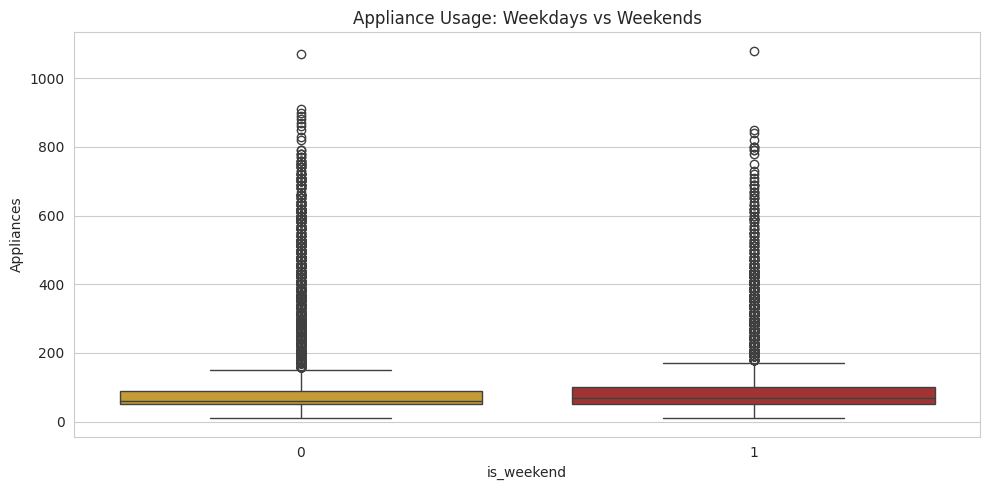

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(10, 5))
sns.boxplot(x='is_weekend', y='Appliances', hue='is_weekend', data=df, palette=['goldenrod', 'firebrick'], legend=False)
plt.title('Appliance Usage: Weekdays vs Weekends')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   Median usage is slightly higher on weekends.
*   Many outliers exist on both sides, but extremely high usage values are seen more on weekdays.
*  Overall, appliance usage patterns are not drastically different between weekdays and weekends.





#### Chart - 4 Appliance usage Vs Temperature

/tmp/ipython-input-65-1910382776.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage = df.groupby(temp_bins)['Appliances'].mean()


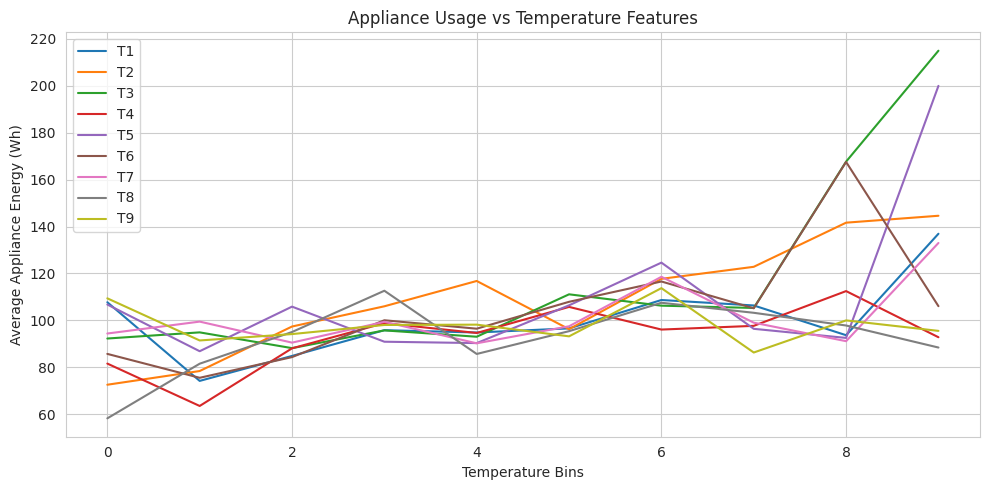

In [ ]:
# Chart - 4 visualization code

temp_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

plt.figure(figsize=(10, 5))

for col in temp_cols:
    temp_bins = pd.cut(df[col], bins=10)
    avg_usage = df.groupby(temp_bins)['Appliances'].mean()
    avg_usage.index = [f'{col}_{i}' for i in range(len(avg_usage))]  # label by feature
    plt.plot(range(len(avg_usage)), avg_usage.values, label=col)

plt.title('Appliance Usage vs Temperature Features')
plt.xlabel('Temperature Bins')
plt.ylabel('Average Appliance Energy (Wh)')
plt.legend()
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

*   Appliance usage generally increases as the temperature bin increases.
*  T3 and T5 show strong positive trends — indicating that higher indoor temperatures at these locations are strongly associated with increased appliance energy usage.
*   T6 actually dips toward the end, whereas T9, T4 and T7 remains mostly flat with slight variation.
*   Usage remains within a consistent band for most features until higher temperature levels.







#### Chart - 5 Appliance Usage with Humidity

/tmp/ipython-input-66-2303529159.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage = df.groupby(rh_bins)['Appliances'].mean()


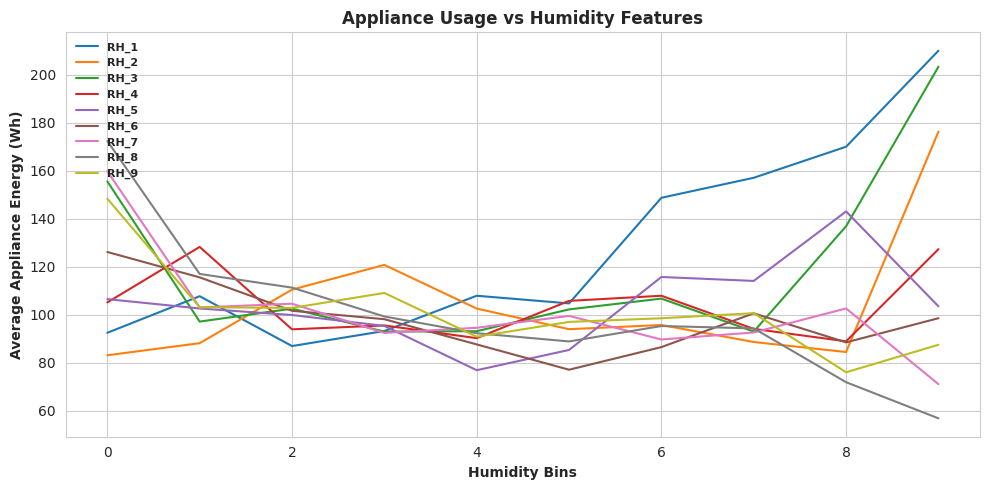

In [ ]:
# Chart - 5 visualization code
humidity_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

plt.figure(figsize=(10, 5))

for col in humidity_cols:
    rh_bins = pd.cut(df[col], bins=10)
    avg_usage = df.groupby(rh_bins)['Appliances'].mean()
    avg_usage.index = [f'{col}_{i}' for i in range(len(avg_usage))]
    plt.plot(range(len(avg_usage)), avg_usage.values, label=col)

plt.title('Appliance Usage vs Humidity Features', fontweight='bold')
plt.xlabel('Humidity Bins', fontweight='bold')
plt.ylabel('Average Appliance Energy (Wh)', fontweight='bold')

legend = plt.legend(loc='upper left', fontsize=8, frameon=False)
for text in legend.get_texts():
    text.set_weight('bold')

plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?



*  RH_1, RH_2 and RH_3 show strong upward trends with increasing humidity, indicating strong correlation with usage.

*   RH_5 dips steeply towards the end, RH_9, RH_5 and RH_6 remain mostly flat or decrease, contributing little to energy variation.
*   At high humidity levels (bins 7–9), the rise in appliance usage is significant for multiple features.

*  Low humidity bins (1-5) generally correspond to lower appliance usage.



#### Chart - 6 Appliance usage Across Windspeed ranges

/tmp/ipython-input-67-1986639657.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_appliance = df.groupby('Windspeed_bin')['Appliances'].mean()


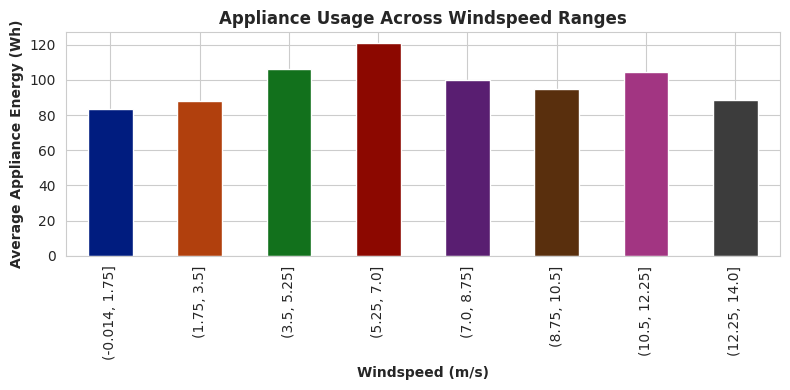

In [ ]:
# Chart - 6 visualization code
df['Windspeed_bin'] = pd.cut(df['Windspeed'], bins=8)
avg_appliance = df.groupby('Windspeed_bin')['Appliances'].mean()

colors = sns.color_palette('dark', n_colors=len(avg_appliance))

avg_appliance.plot(kind='bar', color=colors, figsize=(8, 4))
plt.title('Appliance Usage Across Windspeed Ranges', fontweight='bold')
plt.xlabel('Windspeed (m/s)', fontweight='bold')
plt.ylabel('Average Appliance Energy (Wh)', fontweight='bold')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   Appliance usage is highest at moderate wind speeds.

*   Appliance energy usage peaks in the 5.25–7.0 m/s windspeed range, suggesting that people may use more electrical devices during moderate wind conditions.
*   Usage decreases both at lower and higher windspeed extremes, indicating a potential behavioral or environmental comfort factor.




#### Chart - 7  T_out vs Appliance Usage

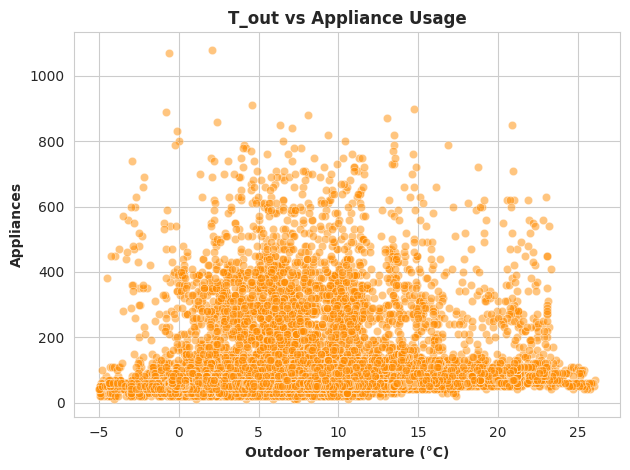

In [ ]:
# Chart - 7 visualization code
sns.scatterplot(data=df, x='T_out', y='Appliances', color='darkorange', alpha=0.5)
plt.title('T_out vs Appliance Usage', fontweight='bold')
plt.xlabel('Outdoor Temperature (°C)', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   Appliance usage appears scattered across all outdoor temperatures, indicating weak direct correlation.

*   Most data points cluster between 0°C and 20°C and under 200 Wh.

*   High appliance usage (>400 Wh) occurs across varying T_out values, showing other factors play a role.

*   Sparse usage at extreme low and high temperatures.



#### Chart - 8 Outdoor Humidity vs Appliance Usage

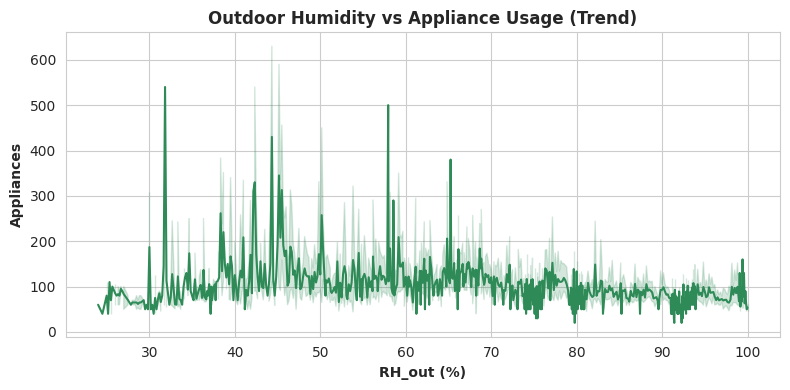

In [ ]:
# Chart - 8 visualization code
sorted_df = df.sort_values('RH_out')

plt.figure(figsize=(8, 4))
sns.lineplot(x=sorted_df['RH_out'], y=sorted_df['Appliances'], color='seagreen')
plt.title('Outdoor Humidity vs Appliance Usage (Trend)', fontweight='bold')
plt.xlabel('RH_out (%)', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?



*   Appliance usage tends to be higher at lower humidity levels (30–60% RH).

*   As RH_out increases beyond 65%, appliance usage shows a declining trend.

*   Several spikes occur in the lower humidity range, possibly due to cooling equipment running more frequently.

*  Fluctuations suggest external humidity influences appliance usage, but not linearly.





#### Chart - 9 Comfort Index vs Appliance usage

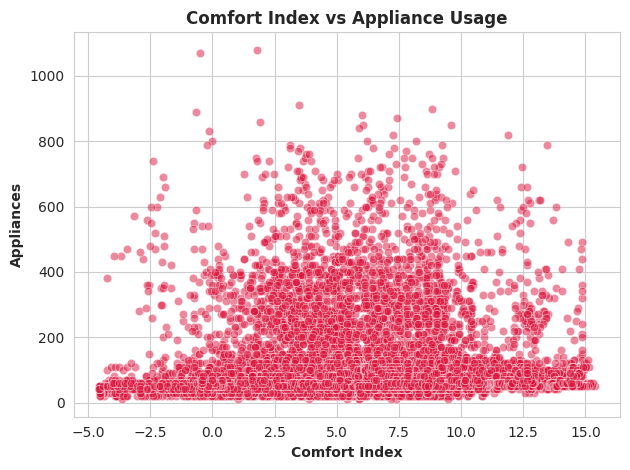

In [ ]:
# Chart - 9 visualization code
df['comfort_index'] = df['T_out'] * df['RH_out'] / 100  # simple scale combo

sns.scatterplot(x='comfort_index', y='Appliances', data=df, color='crimson', alpha=0.5)
plt.title('Comfort Index vs Appliance Usage', fontweight='bold')
plt.xlabel('Comfort Index', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?



*  Appliance usage is highest when the comfort index is between 4 and 8.
*  Beyond a comfort index of 10, usage drops sharply.
*  The pattern suggests that moderate discomfort (mid CI values) leads to more energy use (e.g., for heating/cooling).
*   There is wide spread in appliance usage for low CI values, indicating inconsistent behavior in poor comfort conditions.



#### Chart - 10 Average Appliance Usage by Month

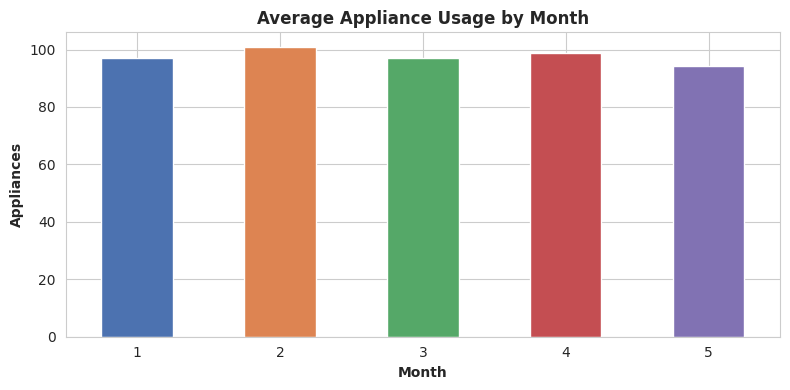

In [ ]:
# Chart - 10 visualization code
month_avg = df.groupby('month')['Appliances'].mean()
colors = sns.color_palette('deep', n_colors=12)
month_avg.plot(kind='bar', color=colors, figsize=(8, 4))
plt.title('Average Appliance Usage by Month', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

*  February (Month 2) has the highest average appliance usage.
*  March and May show slightly lower usage, possibly indicating milder weather and reduced HVAC needs.
*  Seasonal patterns seem subtle but present; energy use doesn't vary drastically month to month.
*  Overall, usage stays around 95–100 Wh on average.

#### Chart - 11 Appliance usage by light level category

/tmp/ipython-input-72-2208756917.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='light_level', y='Appliances', data=df, palette=dark_colors)


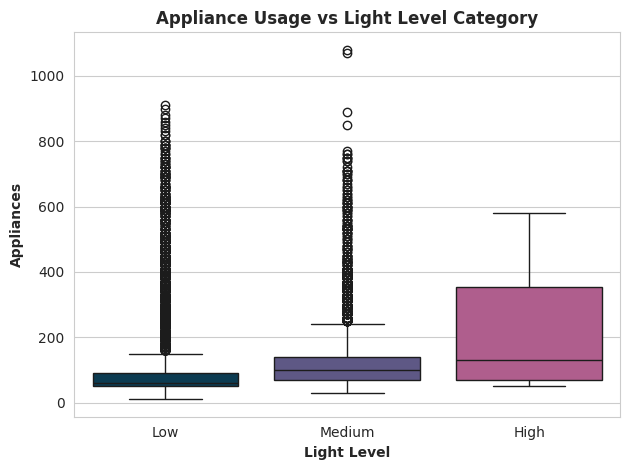

In [ ]:
# Chart - 11 visualization code
df['light_level'] = pd.cut(df['lights'], bins=[-1, 10, 40, df['lights'].max()], labels=['Low', 'Medium', 'High'])

dark_colors = ['#003f5c', '#58508d', '#bc5090']

sns.boxplot(x='light_level', y='Appliances', data=df, palette=dark_colors)
plt.title('Appliance Usage vs Light Level Category', fontweight='bold')
plt.xlabel('Light Level', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

*   High light levels correspond to significantly higher appliance usage.
*   Low and Medium light levels show lower and more stable usage.
*  Distribution is wider under High light, possibly indicating more activity (e.g., cooking, entertainment).
*  Extreme outliers exist under all categories, showing occasional very high usage across all lighting levels.

#### Chart - 12 Weather_Exposure vs Appliance Usage

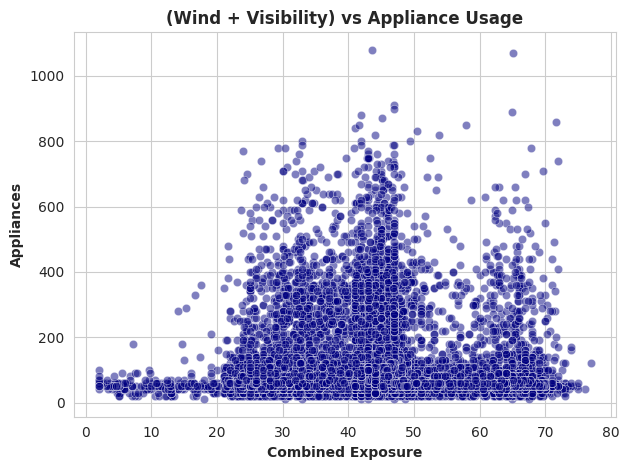

In [ ]:
# Chart - 12 visualization code

df['weather_exposure'] = df['Windspeed'] + df['Visibility']

sns.scatterplot(x='weather_exposure', y='Appliances', data=df, color='navy', alpha=0.5)
plt.title('(Wind + Visibility) vs Appliance Usage', fontweight='bold')
plt.xlabel('Combined Exposure', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

*   Usage is highly concentrated between 40–50 combined exposure range.
*   Most values remain under 200 Wh regardless of exposure.
*   There's no strong direct relationship between combined exposure and appliance usage.
*   Scattered pattern suggests other variables have stronger influence on energy usage.

#### Chart - 13 Appliance usage Dew Point Temperature

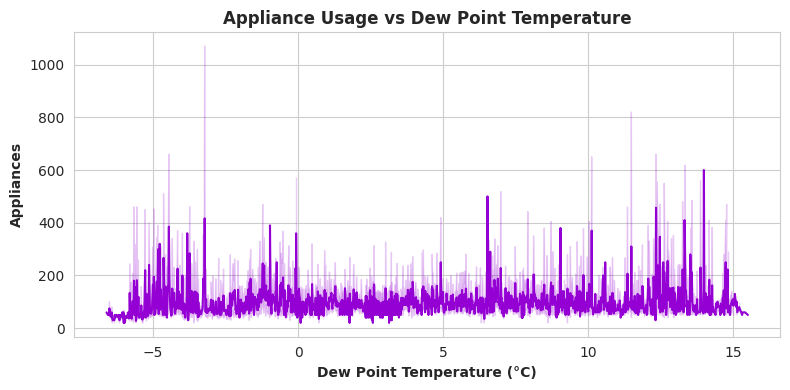

In [ ]:
# Chart - 13 visualization code
sorted_df = df.sort_values('Tdewpoint')

plt.figure(figsize=(8, 4))
sns.lineplot(x=sorted_df['Tdewpoint'], y=sorted_df['Appliances'], color='darkviolet')
plt.title('Appliance Usage vs Dew Point Temperature', fontweight='bold')
plt.xlabel('Dew Point Temperature (°C)', fontweight='bold')
plt.ylabel('Appliances', fontweight='bold')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*  The line plot shows a high variance in appliance usage across different dew point temperatures, with no strong linear relationship.
*   Appliance usage appears scattered and volatile, particularly between -5°C and 5°C, suggesting that dew point alone does not significantly influence appliance use.
*   Hence we can say Dew point temperature has a limited correlation with appliance usage.


#### Chart - 14 - Correlation Heatmap

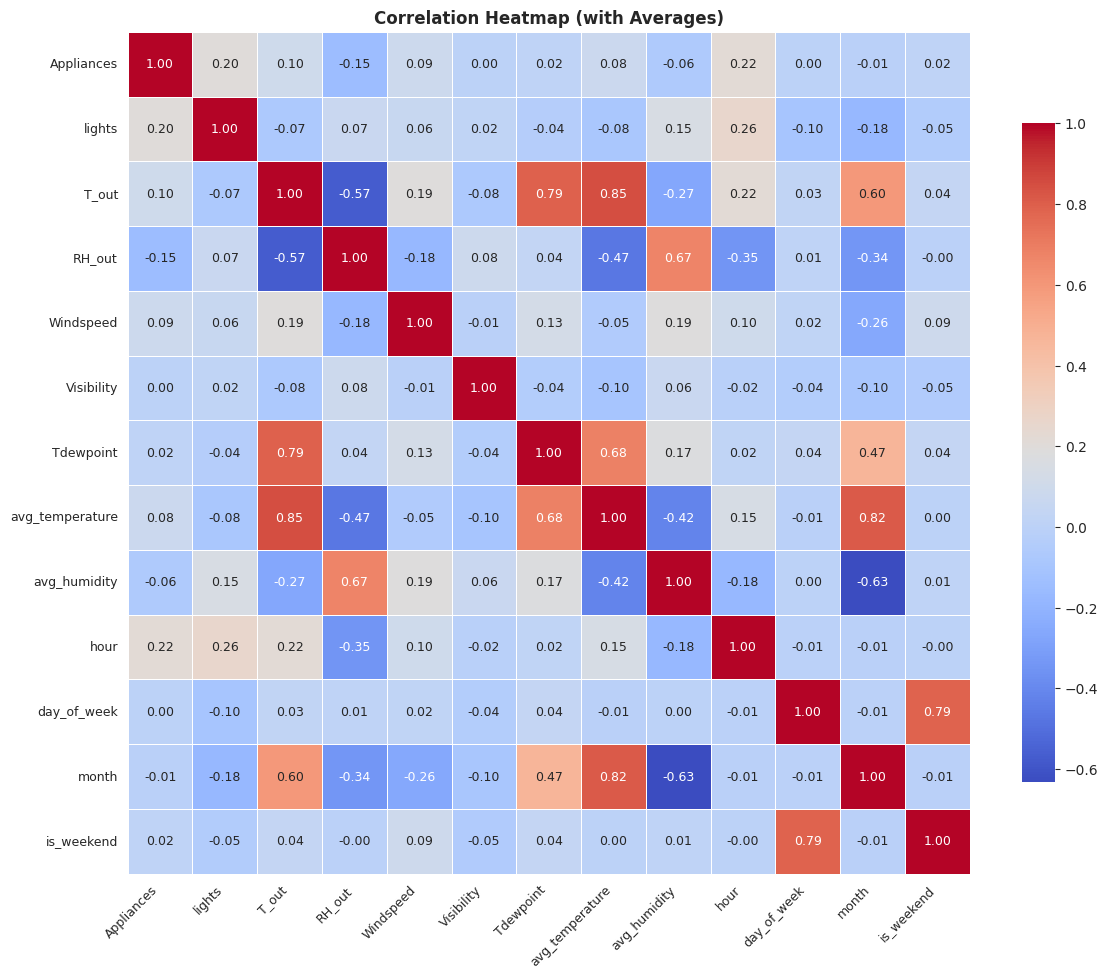

In [ ]:
# Correlation Heatmap visualization code
df['avg_temperature'] = df[['T1','T2','T3','T4','T5','T6','T7','T8','T9']].mean(axis=1)
df['avg_humidity'] = df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']].mean(axis=1)

selected_cols = [
    'Appliances', 'lights', 'T_out', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'avg_temperature', 'avg_humidity', 'hour', 'day_of_week',
    'month', 'is_weekend'
]
plt.figure(figsize=(12, 10))  # Bigger figure
corr_matrix = df[selected_cols].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, annot_kws={"size": 9})
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title('Correlation Heatmap (with Averages)', fontweight='bold')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

*   Temperature and average temperature have the strongest positive correlation with appliance usage

*   A positive correlation (0.10–0.20) of outdoor temperature (T_out), lights with appliance usage.

*  A moderate correlation (0.20) between time-related variables (e.g., hour of the day) and appliance usage.

*  Other variables like windspeed, humidity, and dewpoint have very weak or negative correlations with appliance usage.

#### Chart - 15 - Pair Plot

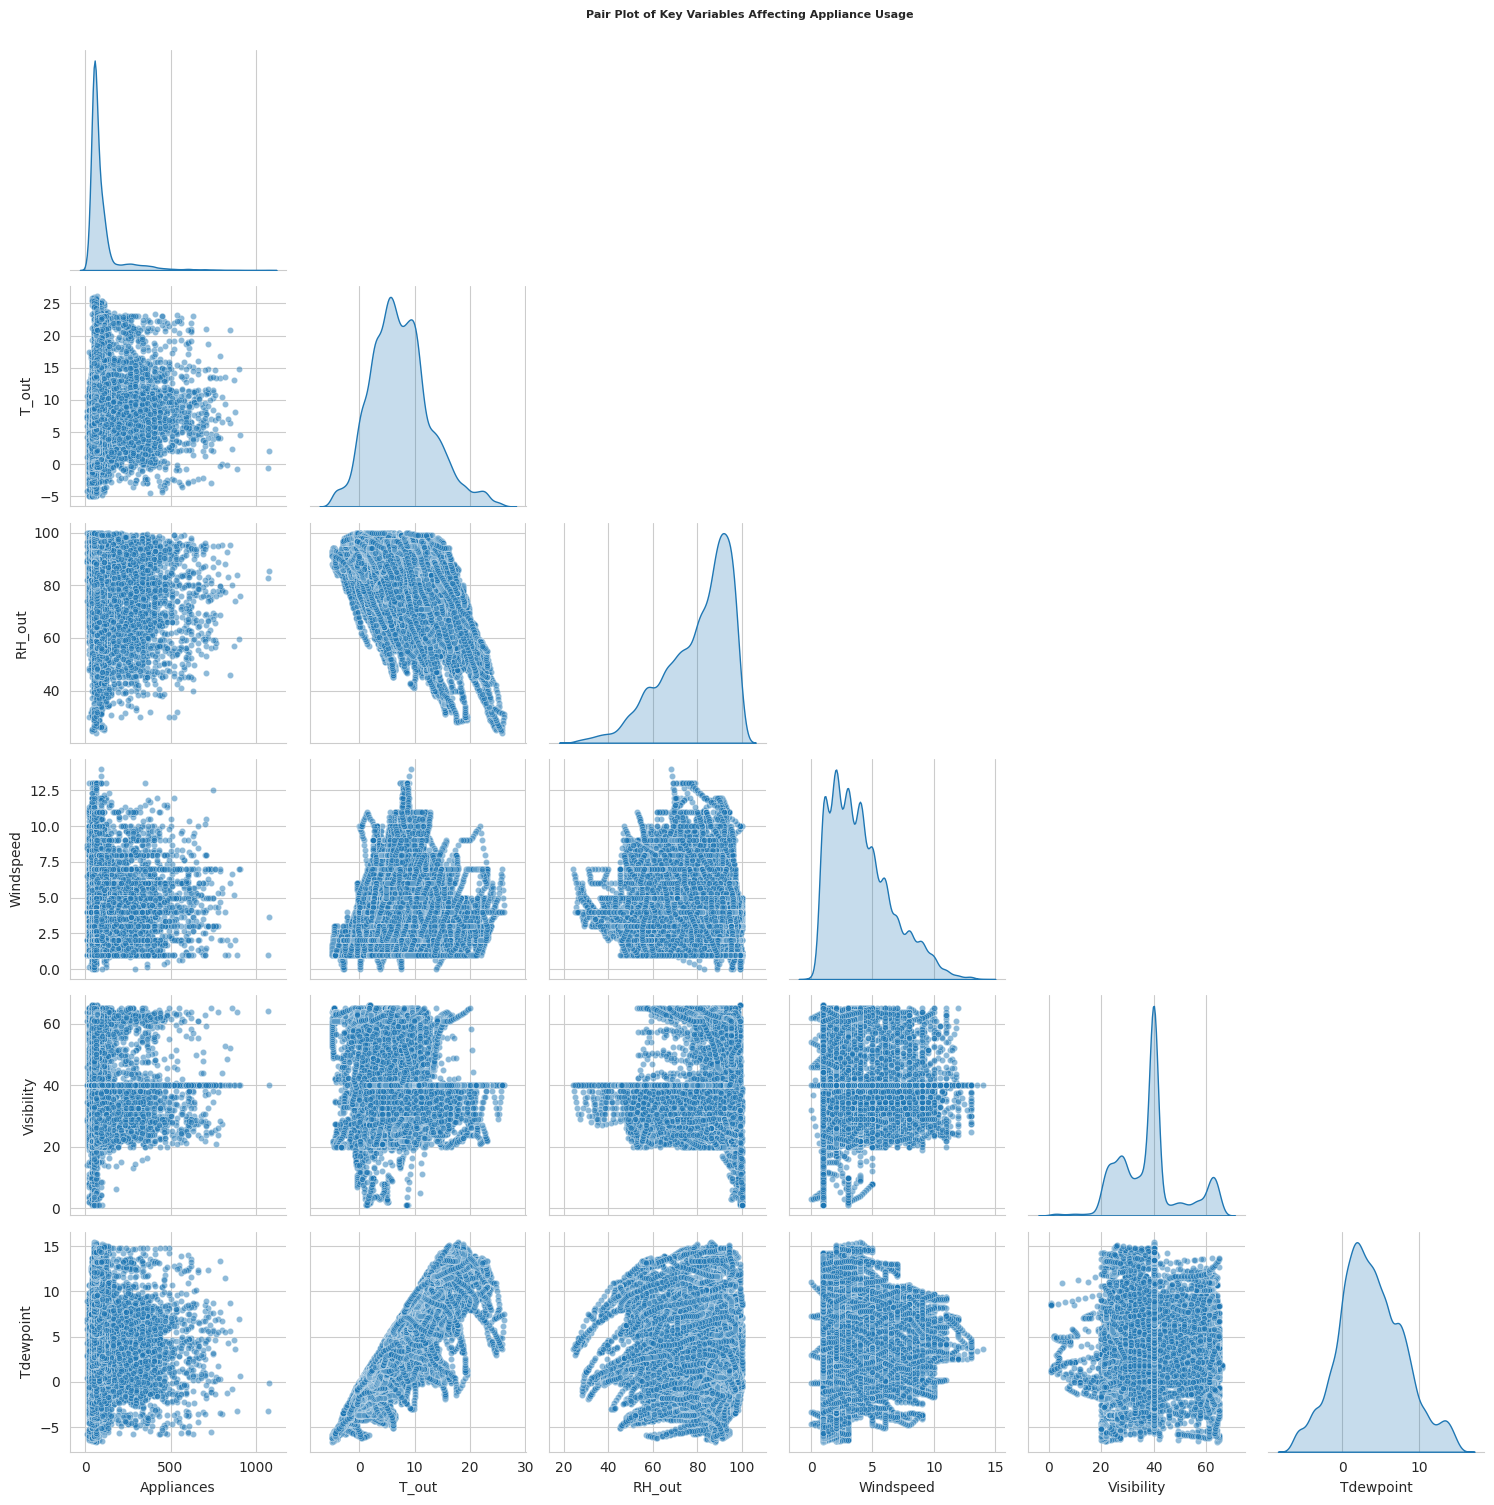

In [ ]:
# Pair Plot visualization code
pair_cols = ['Appliances', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

sns.pairplot(df[pair_cols], corner=True, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pair Plot of Key Variables Affecting Appliance Usage', fontsize=8, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*  Apparent nonlinear patterns between T_out and RH_out (relative humidity), T_out and Tdewpoint, and others.


*  Distributions of variables like windspeed and visibility are skewed, suggesting that some preprocessing may be required before modeling.

*   No obvious direct visual pattern between appliance usage and environmental variables, indicating potential hidden interactions or the need for feature engineering.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.drop(columns=[
    'Windspeed_bin', 'light_level',
    'weather_exposure', 'comfort_index', 'avg_temperature', 'avg_humidity'
], inplace=True)


In [ ]:
# Handling Missing Values & Missing Value Imputation

df.isnull().sum()

# No null values

,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0
RH_4,0
T5,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

No null and missing values in dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

Q1 = df['Appliances'].quantile(0.25)
Q3 = df['Appliances'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Appliances'] < lower_bound) | (df['Appliances'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 2138


In [ ]:
# Limit extreme values to reduce skew without deleting data

df['Appliances'] = df['Appliances'].clip(lower=lower_bound, upper=upper_bound)
print("Outliers after capping:", ((df['Appliances'] < lower_bound) | (df['Appliances'] > upper_bound)).sum())

Outliers after capping: 0


##### What all outlier treatment techniques have you used and why did you use those techniques?

I applied the capping method (Winsorization) to treat outliers in the target variable Appliances. This technique replaced values beyond the IQR threshold with the nearest acceptable limit.

Capping preserves the dataset size while reducing the impact of extreme values that could skew model performance. It was more appropriate than removing outliers, which could have led to significant data loss.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'hour',
       'day_of_week', 'month', 'is_weekend', 'Appliances'],
      dtype='object')

In [ ]:
df[['day_of_week', 'month']] = df[['day_of_week', 'month']].astype(str)
df = pd.get_dummies(df, columns=['day_of_week', 'month'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lights         19735 non-null  int64  
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

#### What all categorical encoding techniques have you used & why did you use those techniques?

We applied One-Hot Encoding to convert categorical variables like day_of_week and month into binary columns. This was done after converting them to string type, ensuring that each unique category gets its own column (excluding one to avoid multicollinearity using drop_first=True).


*   The categorical variables (like day and month) have no ordered relationship, so using Label Encoding could mislead the model.

*   One-Hot Encoding prevents the model from assuming any mathematical order between the categories.

*   It is a standard and safe approach for most machine learning models, especially linear models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Check correlation of all features with target
appliance_corr = df.corr()['Appliances'].sort_values(ascending=False)
print(appliance_corr)


Appliances       1.000000
hour             0.351102
lights           0.269167
T2               0.207619
T6               0.191986
T_out            0.171600
T3               0.150333
T1               0.145240
T8               0.135512
T4               0.112255
Windspeed        0.097248
RH_1             0.093147
T5               0.090935
T7               0.090109
T9               0.070581
Tdewpoint        0.048573
day_of_week_5    0.044797
is_weekend       0.044223
RH_5             0.033899
month_2          0.027555
month_5          0.018069
day_of_week_6    0.012491
month_4          0.011002
month_3          0.007576
day_of_week_4    0.005375
RH_3             0.004857
RH_4             0.000489
day_of_week_2   -0.005547
Visibility      -0.011127
day_of_week_3   -0.040243
day_of_week_1   -0.055444
Press_mm_hg     -0.067343
RH_2            -0.093433
RH_7            -0.097057
RH_9            -0.120642
RH_6            -0.163160
RH_8            -0.166825
RH_out          -0.229414
Name: Applia

In [ ]:
# Average Temperature from T1 to T9
df['avg_temperature'] = df[['T1','T2','T3','T4','T5','T6','T7','T8','T9']].mean(axis=1)

# Average Humidity from RH_1 to RH_9
df['avg_humidity'] = df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']].mean(axis=1)


In [ ]:
print(df[['avg_temperature', 'avg_humidity', 'Appliances']].corr())

                 avg_temperature  avg_humidity  Appliances
avg_temperature         1.000000     -0.417091    0.163409
avg_humidity           -0.417091      1.000000   -0.123768
Appliances              0.163409     -0.123768    1.000000


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
temp_cols = [f'T{i}' for i in range(1, 10)]
humidity_cols = [f'RH_{i}' for i in range(1, 10)]

df.drop(columns=temp_cols + humidity_cols, inplace=True)


In [ ]:
cols_to_drop = [
    'Press_mm_hg', 'RH_out', 'Visibility',  # low correlation
]

# Drop all day_of_week_* and month_* dummy columns
cols_to_drop += [col for col in df.columns if col.startswith('day_of_week_')]
cols_to_drop += [col for col in df.columns if col.startswith('month_')]

# Drop them from the dataframe
df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
df.drop(columns=['avg_humidity'], inplace=True)

In [ ]:
df.columns

Index(['lights', 'T_out', 'Windspeed', 'Tdewpoint', 'hour', 'is_weekend',
       'Appliances', 'avg_temperature'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We used basic statistical and correlation-based feature selection techniques. First, we analyzed the correlation of all independent variables with the target variable Appliances. Features showing very low or negative correlation (e.g., RH_out, Visibility, Press_mm_hg, avg_humidity) were considered uninformative and dropped. We also removed redundant groups of features (like T1–T9 and RH_1–RH_9) after combining them into new aggregate features like avg_temperature and avg_humidity.

##### Which all features you found important and why?

---

The selected features — lights, T_out, Windspeed, Tdewpoint, hour, is_weekend, and avg_temperature — were kept because they showed a decent correlation with Appliances. These features are important for modeling as they help capture patterns in energy usage based on time, weather, and general activity levels in the house.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, some transformation was needed. I applied outlier capping on the target variable Appliances to reduce the effect of extreme values that could distort the model. This helps in stabilizing variance and improving model performance. Other than that, the features were already on a similar scale, so no further transformation like normalization or log-scaling was required.


### 6. Data Scaling

##### Which method have you used to scale you data and why?

We used the StandardScaler method to scale our data.
This method transforms the features by removing the mean and scaling to unit variance (mean = 0, standard deviation = 1). It was chosen because it ensures all features contribute equally to the model and prevents features with larger magnitudes from dominating. StandardScaler is especially effective when the data is approximately normally distributed and is well-suited for regression models.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After feature selection and removal of irrelevant or low-impact features, the dataset was already reduced to a manageable number of variables. Most of the retained features were interpretable and contributed meaningful information to the target (Appliances), so applying dimensionality reduction techniques like PCA would reduce interpretability without offering significant performance gain. Therefore, we chose not to apply additional dimensionality reduction methods

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

X = df.drop('Appliances', axis=1)
y = df['Appliances']

# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = RobustScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


In [ ]:
x_train

array([[ 0.        ,  0.4963145 ,  1.0952381 , ...,  0.07692308,
         0.        , -0.47336212],
       [ 0.        ,  2.32923833, -0.0952381 , ...,  0.46153846,
         0.        ,  2.14542319],
       [ 0.        , -0.04914005,  1.23809524, ...,  0.15384615,
         0.        ,  0.02401823],
       ...,
       [ 0.        , -1.17936118,  0.        , ..., -0.61538462,
         0.        , -0.84775454],
       [ 0.        , -0.71744472, -0.66666667, ...,  0.38461538,
         1.        , -0.19437659],
       [ 0.        , -0.04176904, -0.76190476, ..., -0.15384615,
         1.        ,  0.08149775]])

In [ ]:
y_train

,Appliances
2133,50
19730,100
3288,70
7730,40
8852,40
...,...
11284,60
11964,120
5390,30
860,80


##### What data splitting ratio have you used and why?

We used an 80-20 data splitting ratio, where 80% of the data was used for training and 20% for testing. This split ensures that the model has enough data to learn meaningful patterns during training while keeping a sufficient portion aside to fairly evaluate its performance on unseen data.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predict
lr_train_preds = lr_model.predict(x_train)
lr_test_preds = lr_model.predict(x_test)



Linear Regression Evaluation:
Train Metrics:
 - MAE : 28.408530289581943
 - RMSE: 38.71075887059462
 - R²  : 0.18888168862255206

Test Metrics:
 - MAE : 28.10690844364761
 - RMSE: 38.267995569060766
 - R²  : 0.20320584354805782

Test Metric Percentages (of total):
 - MAE  : 42.35%
 - RMSE : 57.65%
 - R²   : 20.32%


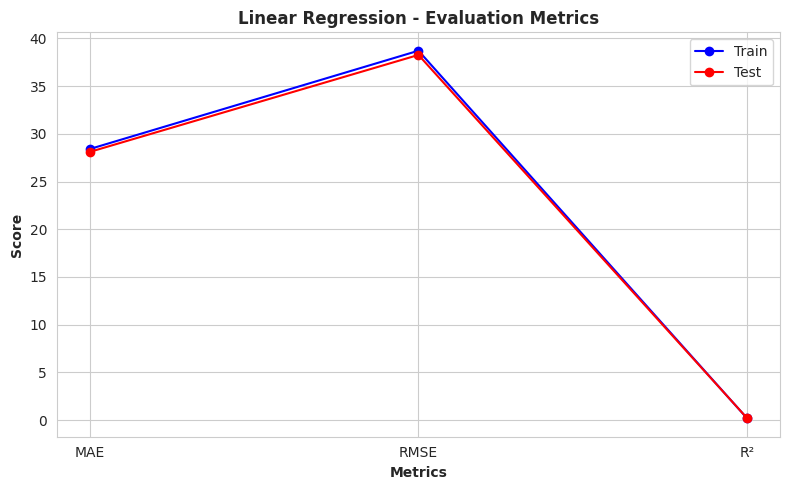

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_train, train_preds, y_test, test_preds):
    print(f"\n{name} Evaluation:")

    # Train metrics
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    train_r2 = r2_score(y_train, train_preds)

    # Test metrics
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    test_r2 = r2_score(y_test, test_preds)

    # Print metrics
    print("Train Metrics:")
    print(" - MAE :", train_mae)
    print(" - RMSE:", train_rmse)
    print(" - R²  :", train_r2)

    print("\nTest Metrics:")
    print(" - MAE :", test_mae)
    print(" - RMSE:", test_rmse)
    print(" - R²  :", test_r2)

    # --- New: Percentage contribution of each test metric ---
    total = test_mae + test_rmse
    test_mae_pct = (test_mae / total) * 100
    test_rmse_pct = (test_rmse / total) * 100
    test_r2_pct = (abs(test_r2)) * 100  # Use abs in case R² is negative

    print("\nTest Metric Percentages (of total):")
    print(f" - MAE  : {test_mae_pct:.2f}%")
    print(f" - RMSE : {test_rmse_pct:.2f}%")
    print(f" - R²   : {test_r2_pct:.2f}%")

    # Plotting absolute values
    metrics = ['MAE', 'RMSE', 'R²']
    train_scores = [train_mae, train_rmse, train_r2]
    test_scores = [test_mae, test_rmse, test_r2]

    plt.figure(figsize=(8, 5))
    plt.plot(metrics, train_scores, marker='o', label='Train', color='blue')
    plt.plot(metrics, test_scores, marker='o', label='Test', color='red')

    plt.title(f'{name} - Evaluation Metrics', fontweight='bold')
    plt.xlabel('Metrics', fontweight='bold')
    plt.ylabel('Score', fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


evaluate_model("Linear Regression", y_train, lr_train_preds, y_test, lr_test_preds)



#### 2. Cross- Validation & Hyperparameter Tuning

Best Ridge Parameters: {'alpha': 10}

Ridge Regression Evaluation:
Train Metrics:
 - MAE : 28.41134767765646
 - RMSE: 38.71077056758503
 - R²  : 0.1888811984412786

Test Metrics:
 - MAE : 28.109845575400033
 - RMSE: 38.2684120594687
 - R²  : 0.2031884996070329

Test Metric Percentages (of total):
 - MAE  : 42.35%
 - RMSE : 57.65%
 - R²   : 20.32%


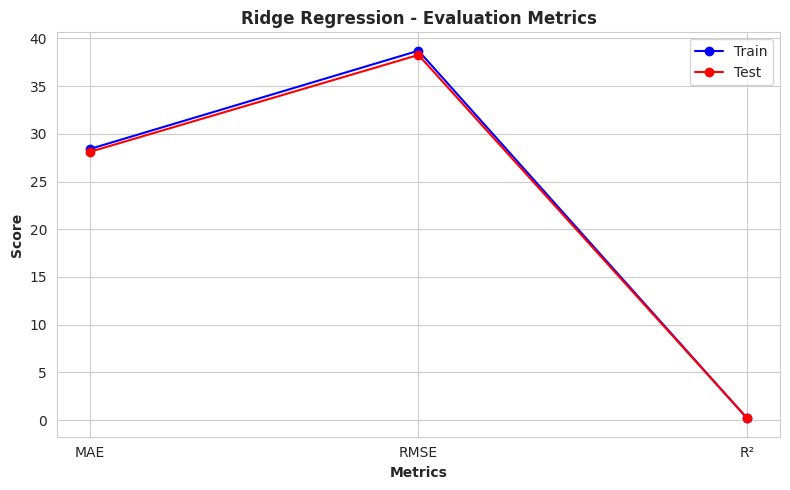

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Grid search on Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train, y_train)

# Best model predictions
ridge_train_preds = ridge_grid.predict(x_train)
ridge_test_preds = ridge_grid.predict(x_test)

# Display best params
print("Best Ridge Parameters:", ridge_grid.best_params_)

# Evaluate
evaluate_model("Ridge Regression", y_train, ridge_train_preds, y_test, ridge_test_preds)


### ML Model - 2


Random Forest Evaluation:
Train Metrics:
 - MAE : 5.974895490245756
 - RMSE: 9.080531110892718
 - R²  : 0.955368309474559

Test Metrics:
 - MAE : 15.552672916138839
 - RMSE: 23.293261632859256
 - R²  : 0.7047871075767769

Test Metric Percentages (of total):
 - MAE  : 40.04%
 - RMSE : 59.96%
 - R²   : 70.48%


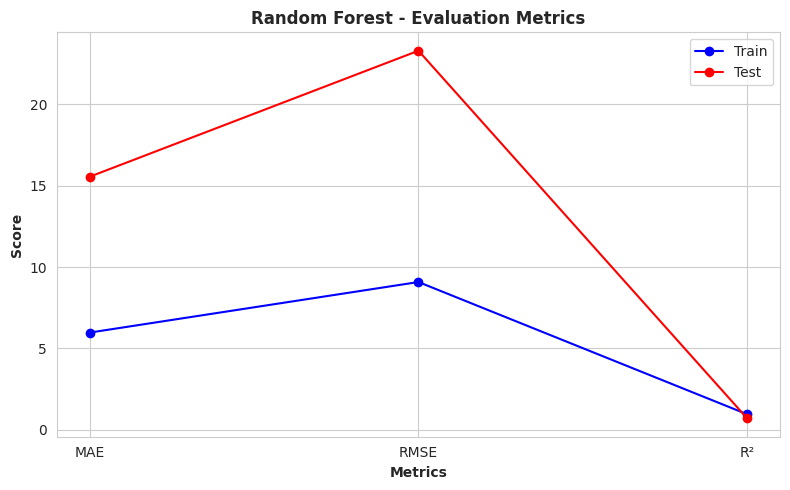

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

# Predictions
rf_train_preds = rf.predict(x_train)
rf_test_preds = rf.predict(x_test)

# Just call the same evaluate_model function
evaluate_model("Random Forest", y_train, rf_train_preds, y_test, rf_test_preds)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Tuned Random Forest Evaluation:
Train Metrics:
 - MAE : 11.66255339336252
 - RMSE: 17.38670615640444
 - R²  : 0.8363728129382962

Test Metrics:
 - MAE : 17.207516852592512
 - RMSE: 25.26802084403431
 - R²  : 0.6526101194348827

Test Metric Percentages (of total):
 - MAE  : 40.51%
 - RMSE : 59.49%
 - R²   : 65.26%


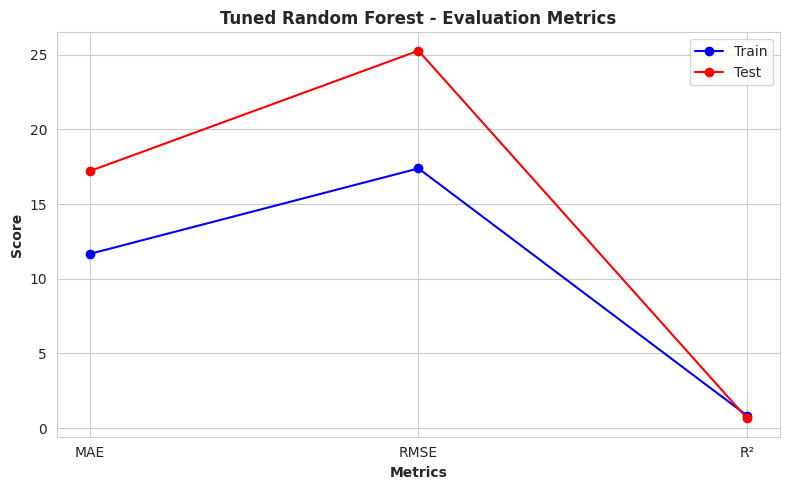

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)
best_rf = random_search.best_estimator_

# Predictions with best model
best_rf_train_preds = best_rf.predict(x_train)
best_rf_test_preds = best_rf.predict(x_test)

# Evaluation
evaluate_model("Tuned Random Forest", y_train, best_rf_train_preds, y_test, best_rf_test_preds)


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We considered the following three evaluation metrics:

*   **MAE**:
It tells us the average absolute difference between actual and predicted values. A lower MAE directly translates to more accurate predictions, which means better control of energy usage.
*   **RMSE** :
RMSE penalizes large errors more than MAE, making it useful in cases where occasional big errors are more costly. For appliance prediction, avoiding such spikes is valuable for both safety and efficiency.
*   **R² Score** :
This helps understand how well the model explains the variance in the target variable. A higher R² means more trust in predictions being consistent with actual behavior.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Dictionary of model predictions
models_preds = {
    "Linear Regression": (lr_train_preds, lr_test_preds),
    "Tuned Ridge Regression": (ridge_train_preds, ridge_test_preds),
    "Random Forest": (rf_train_preds, rf_test_preds),
    "Tuned Random Forest": (best_rf_train_preds, best_rf_test_preds),
}

# Evaluation Function
def print_metrics(name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n{name} Evaluation:")
    print("Train Metrics:")
    print(" - MAE :", mean_absolute_error(y_train, y_train_pred))
    print(" - RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print(" - R²  :", r2_score(y_train, y_train_pred))

    print("Test Metrics:")
    print(" - MAE :", mean_absolute_error(y_test, y_test_pred))
    print(" - RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print(" - R²  :", r2_score(y_test, y_test_pred))

# Loop through each model
for name, (train_pred, test_pred) in models_preds.items():
    print_metrics(name, y_train, train_pred, y_test, test_pred)


Linear Regression Evaluation:
Train Metrics:
 - MAE : 28.408530289581943
 - RMSE: 38.71075887059462
 - R²  : 0.18888168862255206
Test Metrics:
 - MAE : 28.10690844364761
 - RMSE: 38.267995569060766
 - R²  : 0.20320584354805782

Tuned Ridge Regression Evaluation:
Train Metrics:
 - MAE : 28.41134767765646
 - RMSE: 38.71077056758503
 - R²  : 0.1888811984412786
Test Metrics:
 - MAE : 28.109845575400033
 - RMSE: 38.2684120594687
 - R²  : 0.2031884996070329

Random Forest Evaluation:
Train Metrics:
 - MAE : 5.974895490245756
 - RMSE: 9.080531110892718
 - R²  : 0.955368309474559
Test Metrics:
 - MAE : 15.552672916138839
 - RMSE: 23.293261632859256
 - R²  : 0.7047871075767769

Tuned Random Forest Evaluation:
Train Metrics:
 - MAE : 11.66255339336252
 - RMSE: 17.38670615640444
 - R²  : 0.8363728129382962
Test Metrics:
 - MAE : 17.207516852592512
 - RMSE: 25.26802084403431
 - R²  : 0.6526101194348827


Tuned model Ridge either overfit or had worsened performance.
Hence, default Random Forest offered the best trade-off between accuracy and generalization.

*   Best R² score on test data: 0.705.
*   Low error metrics: MAE = 15.55, RMSE = 23.28.
*   Unlike XGBoost, it doesn’t degrade much after tuning and still keeps errors low.
*    No extreme overfitting (Train R² = 0.95, Test R² = 0.70) compared to other models.

We used the Random Forest Regressor — an ensemble learning method based on decision trees.

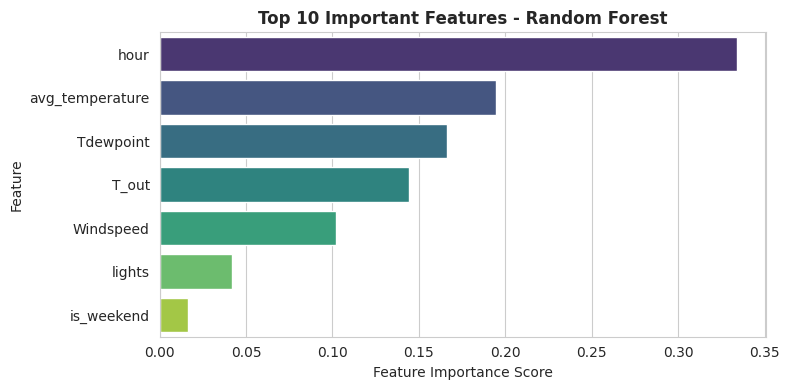

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Add a dummy 'hue' column to work around Seaborn warning
feat_imp_df['Hue'] = feat_imp_df['Feature']  # or simply set it to 1 if legend not needed

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', hue='Hue', dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Important Features - Random Forest', fontweight='bold')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

# **Conclusion**

This project focused on predicting appliance energy usage using various regression models on environmental and time-based features. After thorough preprocessing, feature engineering, and model evaluation, Random Forest Regressor emerged as the best-performing model with a good balance between accuracy and generalization, achieving an R² score of ~0.70 on test data.

Following steps were taken -


*   Handled missing values and dropped irrelevant columns added during plotting.
*   Outliers were treated via capping.
*   Created new features: avg_temperature, avg_humidity, is_weekend, etc.
*   Features were selected based on correlation and business relevance.
*   Removed highly correlated features (T1–T9, RH_1–RH_9) to avoid redundancy.
*   Categorical features were encoded using one-hot encoding.
*   Numeric Data was scaled using StandardScaler for consistent feature contribution.
*   Trained and evaluated 2 models: Linear Regression, Random Forest, selected based on best generalization performance and lowest errors.

*   Used feature importance from Random Forest to identify key factors like T_out, hour, Windspeed, and lights.

Among the models tested (Linear Regression, Ridge, Random Forest, XGBoost), Random Forest offered the best trade-off between low error and high interpretability, and feature importance insights were extracted to understand the key drivers of energy usage (e.g., T_out, hour, Windspeed, lights).

This approach enables smarter energy management decisions by focusing on impactful features, contributing to energy efficiency and sustainability goals.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***